# Fake News Classification using Naive Bayes Classifier

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

### Reading the data and checking the details

In [2]:
df = pd.read_csv('news_articles.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2096 non-null   object 
 1   published                2096 non-null   object 
 2   title                    2096 non-null   object 
 3   text                     2050 non-null   object 
 4   language                 2095 non-null   object 
 5   site_url                 2095 non-null   object 
 6   main_img_url             2095 non-null   object 
 7   type                     2095 non-null   object 
 8   label                    2095 non-null   object 
 9   title_without_stopwords  2094 non-null   object 
 10  text_without_stopwords   2046 non-null   object 
 11  hasImage                 2095 non-null   float64
dtypes: float64(1), object(11)
memory usage: 196.6+ KB


In [3]:
df.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


**Checking for null values and dropping rows consisting null values**

In [4]:
df.isnull().sum()

author                      0
published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     50
hasImage                    1
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.isnull().sum()

author                     0
published                  0
title                      0
text                       0
language                   0
site_url                   0
main_img_url               0
type                       0
label                      0
title_without_stopwords    0
text_without_stopwords     0
hasImage                   0
dtype: int64

### Exploratory Data Analysis

<AxesSubplot:>

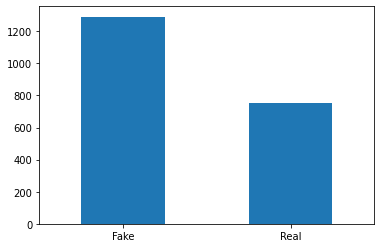

In [7]:
df['label'].value_counts().plot(kind='bar',rot=0)


<AxesSubplot:xlabel='hasImage'>

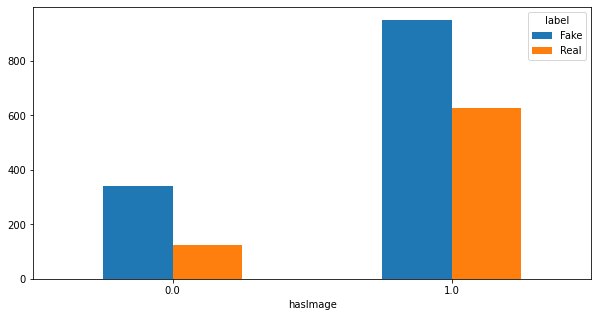

In [8]:
image_df = df.groupby(['hasImage', 'label'])['hasImage'].count().unstack('label')
image_df.plot(kind='bar',figsize = (10,5), rot=0)

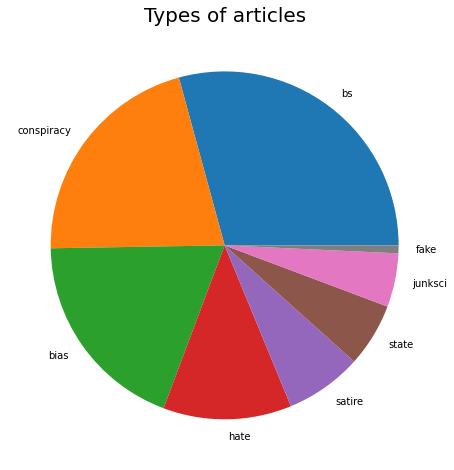

In [9]:
df['type'].value_counts().plot(kind='pie', figsize = (8,8))
plt.title('Types of articles', fontsize = 20)
plt.axis('off')
plt.show()

In [10]:
df.language.unique

<bound method Series.unique of 0       english
1       english
2       english
3       english
4       english
         ...   
2041    english
2042    english
2043    english
2044    english
2045    english
Name: language, Length: 2045, dtype: object>

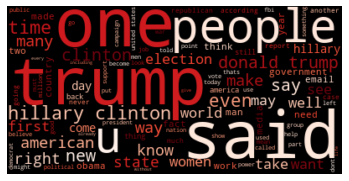

In [11]:
wordcloud = WordCloud(
                          background_color='black',
                          colormap='Reds',
                          max_words=100,
                          max_font_size=80, 
                          random_state=42
                         ).generate(' '.join(df['text_without_stopwords']))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

### Using only the article text

In [12]:
x = df.text_without_stopwords
y = df.label
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [13]:
pipeline = Pipeline([
    ('tfidf_vector', TfidfVectorizer(stop_words = 'english')),
    ('classifier', MultinomialNB())
])

In [14]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('tfidf_vector', TfidfVectorizer(stop_words='english')),
                ('classifier', MultinomialNB())])

In [15]:
pred = pipeline.predict(x_test)

In [16]:
print(metrics.accuracy_score(pred,y_test))

0.6400651465798045


### Using site url with article text

In [17]:
df['site_with_text_without_stopwords'] = df['site_url'].str.cat(df['text_without_stopwords'], sep=" ")

In [18]:
x1 = df.site_with_text_without_stopwords
y1 = df.label
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3)

In [19]:
pipeline.fit(x1_train, y1_train)

Pipeline(steps=[('tfidf_vector', TfidfVectorizer(stop_words='english')),
                ('classifier', MultinomialNB())])

In [20]:
pred1 = pipeline.predict(x1_test)

In [21]:
print(metrics.accuracy_score(pred1,y1_test))

0.742671009771987


In [22]:
df['article'] = df['site_url'] + " " + df['title_without_stopwords'] + " " + df['text_without_stopwords']

In [23]:
x2 = df.article
y2 = df.label
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3)

In [24]:
pipeline.fit(x2_train, y2_train)

Pipeline(steps=[('tfidf_vector', TfidfVectorizer(stop_words='english')),
                ('classifier', MultinomialNB())])

In [25]:
pred2 = pipeline.predict(x2_test)

In [26]:
print(metrics.accuracy_score(pred1,y1_test))

0.742671009771987


### We can see that the site_url improves our accuracy to classify fake news. Thus, the source of the news should be considered when determining whether its fake or not.